In [1]:
import pandas as pd

In [2]:
dataset= pd.read_csv("PrePlacement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

#Normal distribution

C:\Users\PAVAN\AppData\Local\Temp\ipykernel_11136\3471076516.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

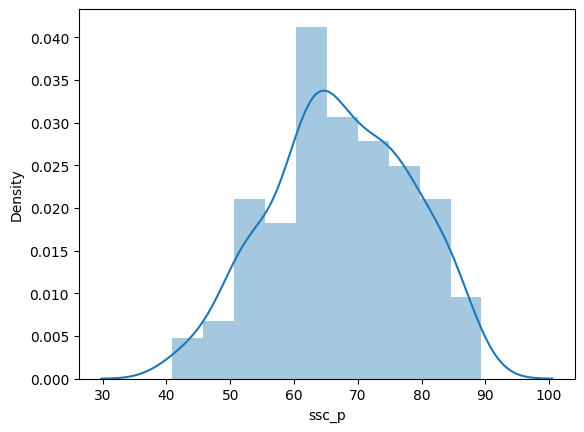

In [4]:
import seaborn as sns
sns.distplot(dataset["ssc_p"])

In [5]:
def get_pdf_probability(dataset,startrange,endrange): 
    from matplotlib import pyplot # to plot vertical lines
    from scipy.stats import norm # to support normal distribution
    import seaborn as sns # to draw histogram.
    ax= sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')# to plot normal distribution using dataset, and differentiate with colors.
    pyplot.axvline(startrange,color='Red') # Used red color to differentiate the vertical line of start range 
    pyplot.axvline(endrange,color='Red') # Used red color to differentiate the vertical line of end range.
    sample= dataset   # to generate a sample using dataset.
    sample_mean= sample.mean() # to get mean of sample.
    sample_std= sample.std() # to get standard deviation of sample.
    print('Mean=%.3f,Standard Deviation=%.3f' % (sample_mean,sample_std)) # to display the mean and standard deviation value upto 3 decimal value.
    dist= norm(sample_mean,sample_std) # to create normal distribution using sample mean and standard deviation.
    values=[value for value in range (startrange,endrange)] # to generate the values within the give range for PDF
    probabilities= [dist.pdf(value) for value in values] # Calculating teh PDF, using the generated values from given range. 
    prob= sum(probabilities) # Adds the PDF value to get the area between the given range
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities))) # to display the area between the given range
    return prob

Mean=67.303,Standard Deviation=10.827
The area between range(60,70):0.3449514151280293


C:\Users\PAVAN\AppData\Local\Temp\ipykernel_11136\3087853603.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')# to plot normal distribution using dataset, and differentiate with colors.


np.float64(0.3449514151280293)

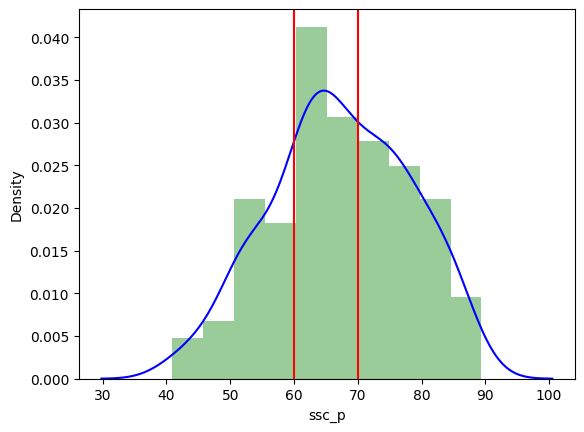

In [6]:
get_pdf_probability(dataset["ssc_p"],60,70)

# Using 'for Loop' instead of one line for loop

In [7]:
def get_pdf_probability(dataset,startrange,endrange): 
    from matplotlib import pyplot 
    from scipy.stats import norm 
    import seaborn as sns 
    ax= sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red') 
    pyplot.axvline(endrange,color='Red')
    sample= dataset  
    sample_mean= sample.mean() 
    sample_std= sample.std() 
    print('Mean=%.3f,Standard Deviation=%.3f' % (sample_mean,sample_std)) 
    dist= norm(sample_mean,sample_std) 
    values=[]
    probabilities=[]
    for value in range(startrange,endrange):
        values.append(value)
    for value in values:
        pdf_value=dist.pdf(value)
        probabilities.append(pdf_value)
    prob= sum(probabilities) 
    print("The area between range({},{}):{}".format(startrange,endrange,prob)) 
    return prob

Mean=67.303,Standard Deviation=10.827
The area between range(60,70):0.3449514151280293


C:\Users\PAVAN\AppData\Local\Temp\ipykernel_11136\2924883713.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


np.float64(0.3449514151280293)

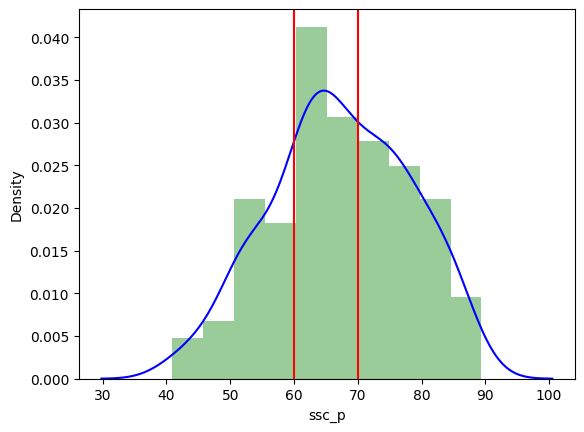

In [8]:
get_pdf_probability(dataset['ssc_p'],60,70)

#CDF - Cummulative density function

In [10]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf= ECDF (dataset['ssc_p'])
ecdf(60)

np.float64(0.24186046511627907)

In [ ]:
#!pip install statsmodels

#Standard normal Distribution 

In [42]:
def StdNBgraph(dataset): # Defines the function
    import seaborn as sns # Used for histogram.
    import numpy as np # use for numpy array
    mean = dataset.mean() # Calculate the mean of dataset
    std = dataset.std() # Calculate the standard deivation of dataset.
    values =[i for i in dataset] # used one line loop to get the values as list from dataset
    z_score = [((j- mean)/std) for j in values] # Created formula to get z_score using values
    sns.distplot(z_score,kde=True) # to plot the distribution of data using z_score
    z_mean = sum(z_score)/len(z_score) # to check the mean of z_score. mean value should be 0.
    print("Mean of z_score:",round(z_mean,4))
    z_std= np.std(z_score) # to check the std of z_score. std should be 1.
    print("Standard deviation of z_score:",round(z_std,4))
    return z_mean,z_std

Mean of z_score: -0.0
Standard deviation of z_score: 0.9977


C:\Users\PAVAN\AppData\Local\Temp\ipykernel_11136\2174360226.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True) # to plot the distribution of data using z_score


(np.float64(-5.453002390717048e-16), np.float64(0.9976717081331424))

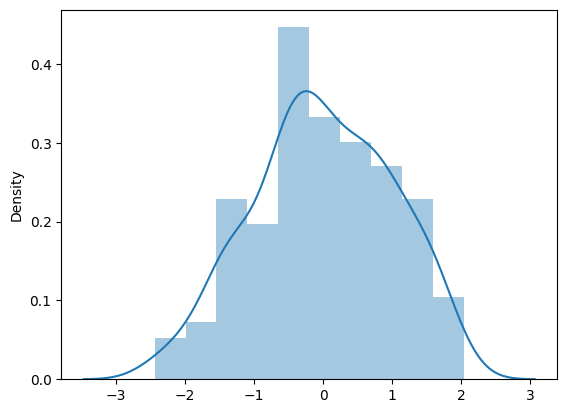

In [43]:
StdNBgraph(dataset['ssc_p'])